In [40]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> data clean-up

In [41]:
df = pd.read_csv('../data/fiesta_data.csv',sep=';')
print(len(df))
df.head()


654


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,199.900 kr.,2022,12000,2022-06-14,Benzin,24.2,125,M,2630
1,100.000 kr.,2015,120000,2016-06-24,Benzin,22.2,140,M,2610
2,179.900 kr.,2021,31000,2020-12-03,Benzin,27.5,155,M,2630
3,134.900 kr.,2019,62000,2019-01-30,Diesel,28.9,85,M,9300
4,129.900 kr.,2017,81000,2017-08-30,Benzin,23.3,100,M,6200


In [42]:
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,199900,2022,12000,2022,Benzin,24.2,125,M,2630
1,100000,2015,120000,2016,Benzin,22.2,140,M,2610
2,179900,2021,31000,2020,Benzin,27.5,155,M,2630
3,134900,2019,62000,2019,Diesel,28.9,85,M,9300
4,129900,2017,81000,2017,Benzin,23.3,100,M,6200
...,...,...,...,...,...,...,...,...,...
649,179900,2021,25000,2021,Benzin,24.2,125,M,6000
650,36900,2008,297000,2008,Benzin,13.5,150,M,8653
651,59900,2012,164000,2012,Benzin,17.5,96,M,3630
652,92000,2015,65000,2015,Benzin,23.3,125,M,7100


In [43]:

if(df['fuel_type'][0] != 'El'):
    df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,199900,2022,12000,2022,24.2,125,2630,0,1,1,0
1,100000,2015,120000,2016,22.2,140,2610,0,1,1,0
2,179900,2021,31000,2020,27.5,155,2630,0,1,1,0
3,134900,2019,62000,2019,28.9,85,9300,0,1,0,1
4,129900,2017,81000,2017,23.3,100,6200,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
649,179900,2021,25000,2021,24.2,125,6000,0,1,1,0
650,36900,2008,297000,2008,13.5,150,8653,0,1,1,0
651,59900,2012,164000,2012,17.5,96,3630,0,1,1,0
652,92000,2015,65000,2015,23.3,125,7100,0,1,1,0


In [44]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df['km'].values.reshape(-1,1))
df['km'] = pd.DataFrame(scaled_df,columns=["km"])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,199900,2022,0.035821,2022,24.2,125,2630,0,1,1,0
1,100000,2015,0.358209,2016,22.2,140,2610,0,1,1,0
2,179900,2021,0.092537,2020,27.5,155,2630,0,1,1,0
3,134900,2019,0.185075,2019,28.9,85,9300,0,1,0,1
4,129900,2017,0.241791,2017,23.3,100,6200,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
649,179900,2021,0.074627,2021,24.2,125,6000,0,1,1,0
650,36900,2008,0.886567,2008,13.5,150,8653,0,1,1,0
651,59900,2012,0.489552,2012,17.5,96,3630,0,1,1,0
652,92000,2015,0.194030,2015,23.3,125,7100,0,1,1,0


<h2>Prediction

In [45]:
#X = ''
#if(df['fuel_type'][0] != 'El'):
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
#else:
    #X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [46]:

#min_max.transform(np.array(8000).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_test,y_test)}')

info_dict = {
    'model_year':2018,
    'km': 40000,
    'reg':2019,
    'fuel_economy':19.3,
    'horse_power':100,
    'gear_type_A': 1,
    'gear_type_M': 0,
    'fuel_type_Benzin': 1,
    'fuel_type_Diesel': 0
}

pred_price = regr.predict(pd.DataFrame(info_dict,index=[0]))

#289900
print(pred_price)

y_pred = regr.predict(X_test)
    

Regression score: 0.9048516284679607
[-3.33598864e+09]


In [47]:
110/112*100

98.21428571428571

In [48]:
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [49]:
get_prediction_score(y_test,y_pred)

82.91231526321491

<h1>data visualization

In [50]:
import seaborn as sns

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
price,1.000000,0.891345,-0.810035,0.892245,0.235890,0.545831,-0.053185,0.192714,-0.192714,0.166120,-0.166120
model_year,0.891345,1.000000,-0.752266,0.994868,0.493809,0.409425,-0.028067,0.089076,-0.089076,0.070612,-0.070612
km,-0.810035,-0.752266,1.000000,-0.757577,-0.242273,-0.319499,0.098760,-0.087875,0.087875,-0.203524,0.203524
reg,0.892245,0.994868,-0.757577,1.000000,0.492422,0.409566,-0.029245,0.087756,-0.087756,0.069551,-0.069551
fuel_economy,0.235890,0.493809,-0.242273,0.492422,1.000000,-0.096070,0.045065,-0.188226,0.188226,-0.633703,0.633703
horse_power,0.545831,0.409425,-0.319499,0.409566,-0.096070,1.000000,-0.046699,-0.049298,0.049298,0.349979,-0.349979
zip_code,-0.053185,-0.028067,0.098760,-0.029245,0.045065,-0.046699,1.000000,-0.059963,0.059963,-0.090429,0.090429
gear_type_A,0.192714,0.089076,-0.087875,0.087756,-0.188226,-0.049298,-0.059963,1.000000,-1.000000,0.081488,-0.081488
gear_type_M,-0.192714,-0.089076,0.087875,-0.087756,0.188226,0.049298,0.059963,-1.000000,1.000000,-0.081488,0.081488
fuel_type_Benzin,0.166120,0.070612,-0.203524,0.069551,-0.633703,0.349979,-0.090429,0.081488,-0.081488,1.000000,-1.000000


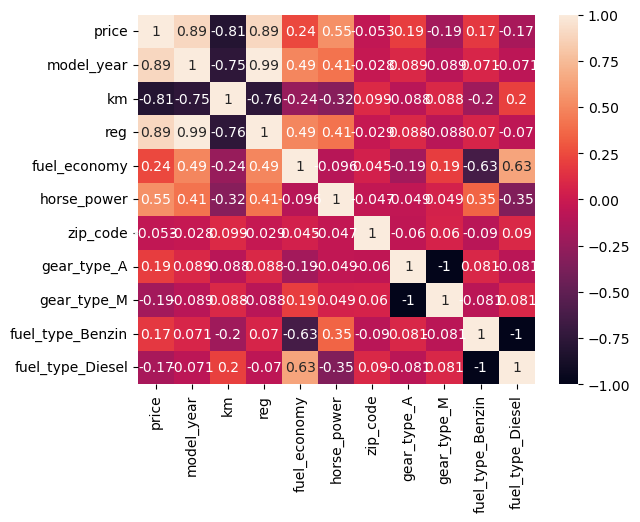

In [51]:
sns.heatmap(df.corr(), annot=True)
df.corr()

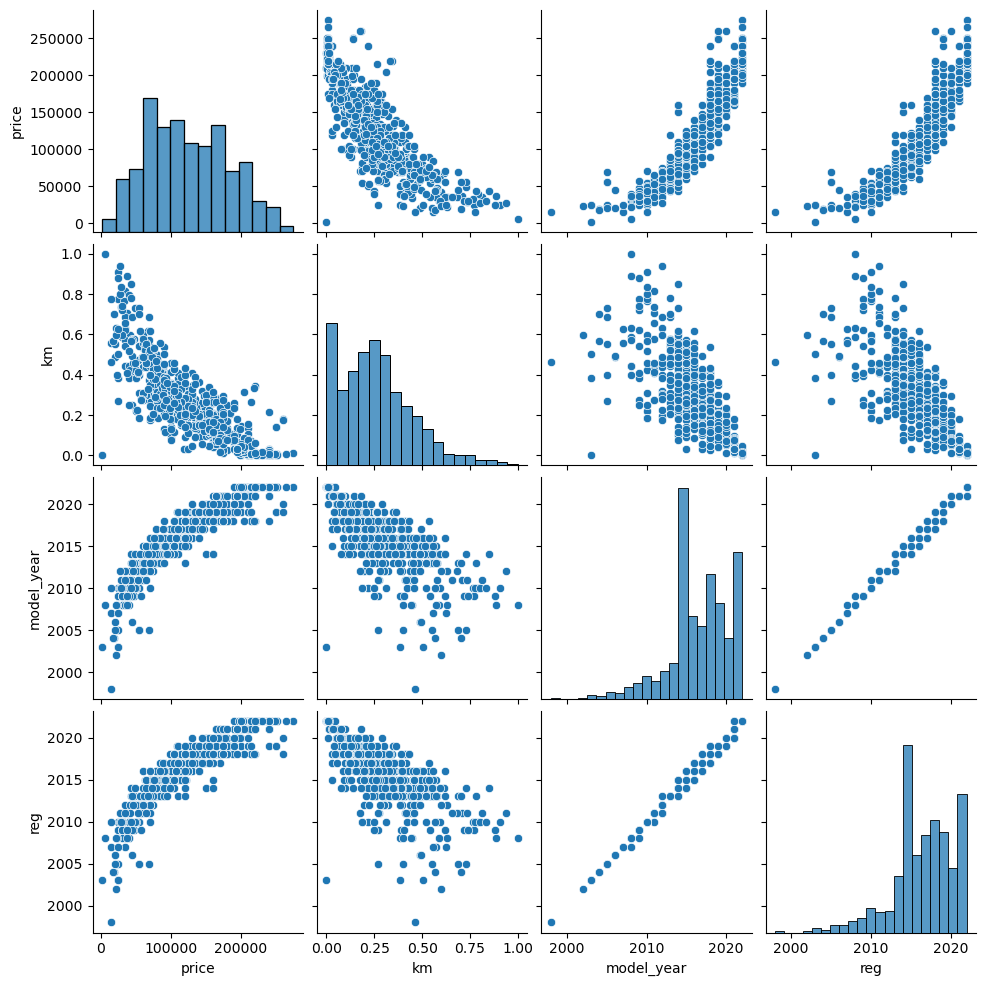

In [52]:
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='model_year'>

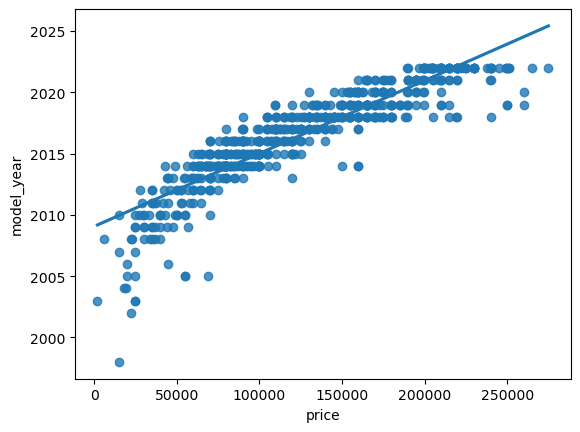

In [53]:
sns.regplot(x=df['price'], y=df['model_year'], ci=None)